In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = sm.datasets.co2.load_pandas()
y = data.data
y

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [3]:
# 'MS' групування місячних даних
y = y['co2'].resample('MS').mean()
# bfill значить, що потрібно використовувати значення до заповнення пропущених значень
y = y.fillna(y.bfill())
print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64


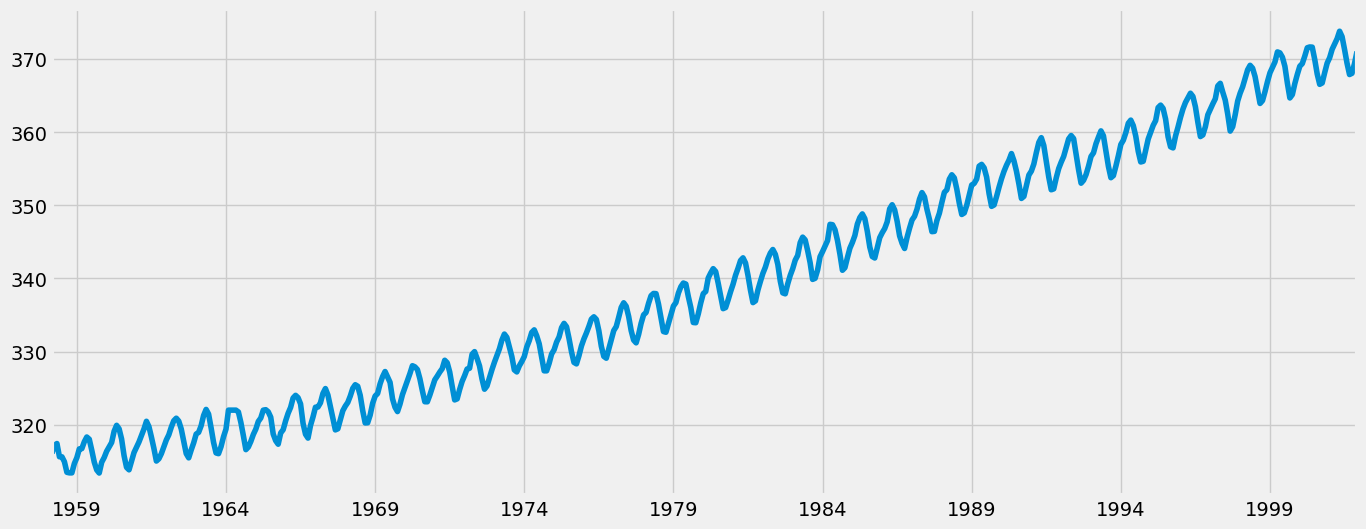

In [4]:
y.plot(figsize=(15, 6))
plt.show()

- p – порядок авторегресії (AR), який дозволяє додати попередні значення часового ряду. Цей параметр можна проілюструвати твердженням «завтра, ймовірно, буде тепло, якщо останні три дні було тепло».
- d – порядок інтегрування (I; тобто порядок різниць вихідного часового ряду). Він додає в модель поняття різниці часових рядів (визначає кількість минулих часових точок, які потрібно відняти від поточного значення). Цей параметр ілюструє таке твердження: 'завтра, ймовірно, буде така сама температура, якщо різниця в температурі за останні три дні була дуже мала'.
- q – порядок ковзного середнього (MA), який дозволяє встановити похибку моделі як лінійну комбінацію значень помилок, що спостерігалися раніше.

(p,d,q)(P,D,Q)s

In [5]:
# Визначення p, d і q у діапазоні 0-2
p = d = q = range(0, 2)
# Генеруємо різні комбінації p, q и q
pdq = list(itertools.product(p, d, q))
# Генеруємо комбінації різних сезонних параметрів p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 
print('Приклади комбінацій параметрів для сезонних ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Приклади комбінацій параметрів для сезонних ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [6]:
warnings.filterwarnings("ignore") # Вимикаємо попередження
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23439D+00    |proj g|=  7.60014D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   7.600D-07   7.234D+00
  F =   7.2343948953241553     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.51399D+00    |proj g|=  3.00341D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     11      1     0     0   4.404D-07   1.514D+00
  F =   1.5139840045280437     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.711172763502
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00279D+00    |proj g|=  1.23380D+00


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     20      1     0     0   1.234D+00   1.003D+00
  F =   1.0027936236996264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.938892132007
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00474D+00    |proj g|=  1.83808D+01

At iterate    5    f=  1.00373D+00    |proj g|=  1.57826D+01

At iterate   10    f=  9.99143D-01    |proj g|=  2.79267D+00

At iterate   1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29055D+00    |proj g|=  1.17845D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     11      1     0     0   1.178D-05   1.291D+00
  F =   1.2905493325168356     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.657897807711
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variable

 This problem is unconstrained.



At iterate    5    f=  1.06258D+00    |proj g|=  6.84024D-01

At iterate   10    f=  9.89318D-01    |proj g|=  2.29546D-01

At iterate   15    f=  9.87419D-01    |proj g|=  4.92627D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     24      1     0     0   4.926D-05   9.874D-01
  F =  0.98741900314795061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.764791311644
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048754544339
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31524D+00    |proj g|=  7.14071D-01


 This problem is unconstrained.



At iterate    5    f=  6.64698D+00    |proj g|=  8.76742D-02

At iterate   10    f=  6.61982D+00    |proj g|=  2.62308D-03

At iterate   15    f=  6.61729D+00    |proj g|=  3.23016D-02

At iterate   20    f=  6.45230D+00    |proj g|=  6.22391D-01

At iterate   25    f=  5.81084D+00    |proj g|=  3.95471D-01

At iterate   30    f=  5.76680D+00    |proj g|=  3.56247D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     61      1     0     0   9.750D-05   5.767D+00
  F =   5.7667892860095415     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662328882

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45777D+00    |proj g|=  3.88166D-01

At iterate    5    f=  1.30724D+00    |proj g|=  8.57511D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     10      1     0     0   8.402D-06   1.307D+00
  F =   1.3072187326393865     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067366345
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 

 This problem is unconstrained.



At iterate    5    f=  6.58167D+00    |proj g|=  1.30735D-02

At iterate   10    f=  6.57880D+00    |proj g|=  1.23448D-01

At iterate   15    f=  2.62706D+00    |proj g|=  2.10105D+02
  ys=-2.604E+01  -gs= 9.785E-01 BFGS update SKIPPED

At iterate   20    f=  2.25308D+00    |proj g|=  4.22802D+01

At iterate   25    f=  1.56436D+00    |proj g|=  3.74916D+01

At iterate   30    f=  1.29206D+00    |proj g|=  6.49883D+01

At iterate   35    f=  1.15208D+00    |proj g|=  3.38995D+01

At iterate   40    f=  1.08603D+00    |proj g|=  1.01987D+01

At iterate   45    f=  1.04519D+00    |proj g|=  7.99331D+00

At iterate   50    f=  1.03070D+00    |proj g|=  7.98921D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   10    f=  6.53258D+00    |proj g|=  3.36601D-02

At iterate   15    f=  6.52695D+00    |proj g|=  1.09403D-01
  ys=-3.566E-01  -gs= 7.977E-01 BFGS update SKIPPED

At iterate   20    f=  4.56050D+00    |proj g|=  1.60335D+01

At iterate   25    f=  3.21505D+00    |proj g|=  1.95292D+01

At iterate   30    f=  1.14625D+00    |proj g|=  6.88871D+01

At iterate   35    f=  9.19717D-01    |proj g|=  1.71291D+00

At iterate   40    f=  8.20554D-01    |proj g|=  3.11129D+00

At iterate   45    f=  7.89841D-01    |proj g|=  5.46978D+00

At iterate   50    f=  7.76384D-01    |proj g|=  4.52756D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f=  1.05857D+00    |proj g|=  5.86792D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   2.643D-06   1.059D+00
  F =   1.0585511305721695     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893619225


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38037D+00    |proj g|=  8.40437D-01

At iterate    5    f=  8.24064D-01    |proj g|=  2.82784D-01

At iterate   10    f=  7.62223D-01    |proj g|=  1.24098D-01

At iterate   15    f=  7.59593D-01    |proj g|=  2.13930D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     31      1     0     0   8.784D-06   7.596D-01
  F =  0.75959248932919521     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0,

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     13      1     0     0   8.932D-06   1.175D+00
  F =   1.1751151330032392     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194076
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.00406D-01    |proj g|=  5.95692D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.17359D-01    |proj g|=  5.15779D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     17      1     0     0   1.091D-05   3.173D-01
  F =  0.31729453891651921     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:337.7938549401782


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85504D-01    |proj g|=  4.86123D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      8      1     0     0   4.923D-05   5.855D-01
  F =  0.58550396949200323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:619.9501759055873
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62371D-01    |proj g|=  2.18976D-01

At iterate    5    f=  3.12843D-01    |proj g|=  2.52151D-01
  ys=-1.301E-02  -gs= 6.897E-05 BFGS update SKIPPED

At iterate   10    f=  3.01760D-01    |proj g|=  1.19841D+00

At iterate   15    f=  3.01639D-01    |proj g|=  3.86218D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     39      1     1     0   6.074D-07   3.016D-01
  F =  0.30163941611217188     

CONVERGENCE: NORM

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.04172D+00    |proj g|=  1.23976D-02

At iterate   10    f=  1.04167D+00    |proj g|=  1.98745D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     15      1     0     0   1.987D-06   1.042D+00
  F =   1.0416740241732299     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1101.8410734302379
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56081D-01    |proj g|=  8.47704D-02

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:587.9479710261149
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52013D-01    |proj g|=  8.36236D-01

At iterate    5    f=  2.85305D-01    |proj g|=  3.64887D-01

At iterate   10    f=  2.81840D-01    |proj g|=  1.49149D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     27      1     0     0   4.487D-05   2.818D-01
  F =  0.28183925862199372     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.52205D-01    |proj g|=  1.10078D-01

At iterate   10    f=  5.49842D-01    |proj g|=  6.63646D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     18      1     0     0   6.636D-06   5.498D-01
  F =  0.54984159063715154     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:584.4333533502834
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24872D+00    |proj g|=  2.24405D+00

At iterate    

 This problem is unconstrained.



At iterate   10    f=  4.05976D-01    |proj g|=  1.17090D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     16      1     0     0   1.171D-06   4.060D-01
  F =  0.40597562813901156     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:433.08636080224016
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53731D-01    |proj g|=  8.34383D-01


 This problem is unconstrained.



At iterate    5    f=  2.80421D-01    |proj g|=  4.65721D-01

At iterate   10    f=  2.62225D-01    |proj g|=  2.51436D-02
  ys=-4.437E-03  -gs= 1.826E-04 BFGS update SKIPPED

At iterate   15    f=  2.60035D-01    |proj g|=  7.45557D-03

At iterate   20    f=  2.60013D-01    |proj g|=  1.40825D-01

At iterate   25    f=  2.59999D-01    |proj g|=  2.35823D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     63      1     1     0   1.965D-04   2.600D-01
  F =  0.25999906689464830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.51901837317
RUNNING 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     19      1     0     0   4.071D-01   1.590D+00
  F =   1.5901978866313740     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1676.8881767362054
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.53967D+00    |proj g|=  7.90235D-01

At iterate    5    f=  1.39003D+00    |proj g|=  1.82277D+01

At iterate   10    f=  1.37228D+00    |proj g|=  4.56568D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.48216D-01    |proj g|=  4.09012D-01

At iterate   10    f=  3.18782D-01    |proj g|=  2.78051D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     24      1     0     0   2.655D-05   3.187D-01
  F =  0.31871640804584339     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:341.2896612642272
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13553D+00    |proj g|=  7.02833D-01

At iterate    

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     38      1     0     0   1.186D-01   5.450D-01
  F =  0.54504713266462856     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:579.3895835631893
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12698D+00    |proj g|=  7.17839D-01


 This problem is unconstrained.



At iterate    5    f=  5.00407D-01    |proj g|=  4.01628D-01

At iterate   10    f=  4.60512D-01    |proj g|=  1.23538D+01

At iterate   15    f=  4.35466D-01    |proj g|=  1.97215D-01

At iterate   20    f=  4.20020D-01    |proj g|=  8.02679D-01

At iterate   25    f=  3.47416D-01    |proj g|=  1.21400D+01

At iterate   30    f=  3.44670D-01    |proj g|=  8.09580D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     93      2     0     0   7.286D-04   3.447D-01
  F =  0.34466925492579120     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:370.5920561819323
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12946D+00    |proj g|=  2.49990D+00

At iterate    5    f=  4.95731D-01    |proj g|=  1.56171D+00

At iterate   10    f=  4.46816D-01    |proj g|=  4.98488D-04

           * *

 This problem is unconstrained.



At iterate    5    f=  4.39842D-01    |proj g|=  1.23655D+00

At iterate   10    f=  3.12520D-01    |proj g|=  7.25877D-01

At iterate   15    f=  3.05696D-01    |proj g|=  1.82219D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     31      1     0     0   3.878D-04   3.057D-01
  F =  0.30568868635505164     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:329.58449804551435
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     67      2     0     0   6.888D-02   1.299D+00
  F =   1.2990575933138708     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1372.608588166192
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24590D+00    |proj g|=  1.24549D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.67253D+00    |proj g|=  1.02537D+02

At iterate   10    f=  1.13950D+00    |proj g|=  3.86372D+00

At iterate   15    f=  1.13903D+00    |proj g|=  3.73328D-01

At iterate   20    f=  1.13825D+00    |proj g|=  7.69438D+00

At iterate   25    f=  1.13266D+00    |proj g|=  1.84988D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     80      2     0     0   8.292D-02   1.133D+00
  F =   1.1325939256509228     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1199.4888097847706
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53171D-01    |proj g|=  4.79351D-02

At iterate    5    f=  5.51757D-01    |proj g|=  2.13536D-03

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26723D-01    |proj g|=  4.49459D-01

At iterate    5    f=  3.05800D-01    |proj g|=  1.26893D+00

At iterate   10    f=  2.83071D-01    |proj g|=  1.00673D-01

At iterate   15    f=  2.82957D-01    |proj g|=  8.69947D-02

At iterate   20    f=  2.82916D-01    |proj g|=  1.18023D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     48      1     0     0   1.180D-04   2.829D-01
  F =  0.28291576337208629     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:305.6273830674348


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.91670D+00    |proj g|=  5.15561D+00

At iterate    5    f=  1.07143D+00    |proj g|=  8.46900D+00

At iterate   10    f=  8.49395D-01    |proj g|=  1.19005D+00

At iterate   15    f=  6.39269D-01    |proj g|=  3.86066D+00

At iterate   20    f=  5.77412D-01    |proj g|=  1.38315D+00

At iterate   25    f=  5.76716D-01    |proj g|=  1.16883D-01

At iterate   30    f=  5.70754D-01    |proj g|=  2.67653D+00

At iterate   35    f=  5.61675D-01    |proj g|=  5.57216D-01

At iterate   40    f=  5.55413D-01    |proj g|=  6.56747D-01

At iterate   45    f=  5.52308D-01    |proj g|=  1.28723D+00

At iterate   50    f=  5.50368D-01    |proj g|=  1.50533D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  8.69778D-01    |proj g|=  4.59197D+00

At iterate   15    f=  5.57023D-01    |proj g|=  3.89413D+01

At iterate   20    f=  5.37901D-01    |proj g|=  3.91766D-01

At iterate   25    f=  4.63587D-01    |proj g|=  4.66173D+00

At iterate   30    f=  4.09515D-01    |proj g|=  6.46600D+00

At iterate   35    f=  3.76070D-01    |proj g|=  2.12553D+01

At iterate   40    f=  3.70563D-01    |proj g|=  2.35140D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   45    f=  3.69941D-01    |proj g|=  5.62306D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     85      1     0     0   5.623D-02   3.699D-01
  F =  0.36994103490766483     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:399.1779687228634
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12248D+00    |proj g|=  2.79627D+00

At iterate    5    f=  5.84934D-01    |proj g|=  1.58176D+00

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  4.23353D-01    |proj g|=  1.40287D+00

At iterate   10    f=  2.69167D-01    |proj g|=  9.49164D-02

At iterate   15    f=  2.62174D-01    |proj g|=  2.76511D-01

At iterate   20    f=  2.62143D-01    |proj g|=  4.26417D-02

At iterate   25    f=  2.62134D-01    |proj g|=  4.53980D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     42      1     0     0   3.654D-03   2.621D-01
  F =  0.26213418912481845     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:285.765166959309
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   5.316D-07   1.003D+00
  F =   1.0027901059354736     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1060.9351914441181
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.67245D-01    |proj g|=  5.93888D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69544D-01    |proj g|=  8.63126D-01

At iterate    5    f=  2.91949D-01    |proj g|=  1.46838D-01

At iterate   10    f=  2.91003D-01    |proj g|=  2.69872D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     20      1     0     0   1.099D-05   2.910D-01
  F =  0.29100091566863789     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:312.1329632834071
RUNNING THE L-B

 This problem is unconstrained.



At iterate    5    f=  5.75628D-01    |proj g|=  3.63884D-01

At iterate   10    f=  5.58616D-01    |proj g|=  3.93378D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     21      1     0     0   3.522D-05   5.586D-01
  F =  0.55861575619161363     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:593.6637755135775
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.05532D-01    |proj g|=  7.73894D-01


 This problem is unconstrained.



At iterate    5    f=  5.59745D-01    |proj g|=  7.47403D-01

At iterate   10    f=  3.25570D-01    |proj g|=  2.29064D-01

At iterate   15    f=  3.24343D-01    |proj g|=  5.61203D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     31      1     0     0   1.281D-04   3.243D-01
  F =  0.32434329613612556     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:349.20914753520407
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  4.12686D-01    |proj g|=  1.06283D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     14      1     0     0   2.319D-05   4.127D-01
  F =  0.41267831603562655     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:440.1375884694791
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71434D-01    |proj g|=  8.61170D-01


 This problem is unconstrained.



At iterate    5    f=  2.88784D-01    |proj g|=  2.03587D-01

At iterate   10    f=  2.71849D-01    |proj g|=  6.64302D-02

At iterate   15    f=  2.71623D-01    |proj g|=  3.00493D-03

At iterate   20    f=  2.71618D-01    |proj g|=  4.11927D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     37      1     0     0   4.119D-05   2.716D-01
  F =  0.27161846231819203     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:293.742622358738
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1262.6545542460194
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06818D+00    |proj g|=  3.14713D-01

At iterate    5    f=  9.92474D-01    |proj g|=  2.76232D-03

At iterate   10    f=  9.92456D-01    |proj g|=  1.13035D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   3.403D-07   9.925D-01
  F =  0.99245596236291100     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:581.3099935189065
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46058D-01    |proj g|=  8.49033D-01

At iterate    5    f=  2.77559D-01    |proj g|=  3.74660D-01

At iterate   10    f=  2.73914D-01    |proj g|=  9.30303D-03

At iterate   15    f=  2.73705D-01    |proj g|=  1.65251D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     39      1     0     0   1.725D-05   2.737D-01
  F =  0.27370475872467159     

CONVERGENCE: R


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  5.62409D-01    |proj g|=  6.08420D-01

At iterate   10    f=  5.47159D-01    |proj g|=  5.87425D-02

At iterate   15    f=  5.40901D-01    |proj g|=  4.34408D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     27      1     0     0   1.131D-05   5.407D-01
  F =  0.54074592313902148     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:576.8647111422506
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  4.38421D-01    |proj g|=  9.83405D-01

At iterate   10    f=  3.12436D-01    |proj g|=  2.91344D-01

At iterate   15    f=  3.10742D-01    |proj g|=  1.40804D-01

At iterate   20    f=  3.08176D-01    |proj g|=  1.25482D+00

At iterate   25    f=  3.02372D-01    |proj g|=  3.02975D-02

At iterate   30    f=  3.02192D-01    |proj g|=  3.71706D-02

At iterate   35    f=  3.02191D-01    |proj g|=  7.31357D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     52      1     0     0   4.998D-05   3.022D-01
  F =  0.30219098174888814     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     16      1     0     0   5.155D-01   4.146D-01
  F =  0.41456689035193950     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:444.12436865024034
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.49067D-01    |proj g|=  8.40987D-01


 This problem is unconstrained.



At iterate    5    f=  2.76116D-01    |proj g|=  4.65690D-01

At iterate   10    f=  2.57264D-01    |proj g|=  2.41843D-02

At iterate   15    f=  2.54556D-01    |proj g|=  7.32358D-03

At iterate   20    f=  2.54548D-01    |proj g|=  2.05315D-03

At iterate   25    f=  2.54544D-01    |proj g|=  3.10125D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     57      1     0     0   1.713D-02   2.545D-01
  F =  0.25454389880640615     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:277.78018154433926


In [7]:
mod = sm.tsa.statespace.SARIMAX(y, 
                                order=(1, 1, 1), 
                                seasonal_order=(1, 1, 1, 12), 
                                enforce_stationarity=False, 
                                enforce_invertibility=False)
results = mod.fit()

In [8]:
results

In [9]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.442      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.163      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.811      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


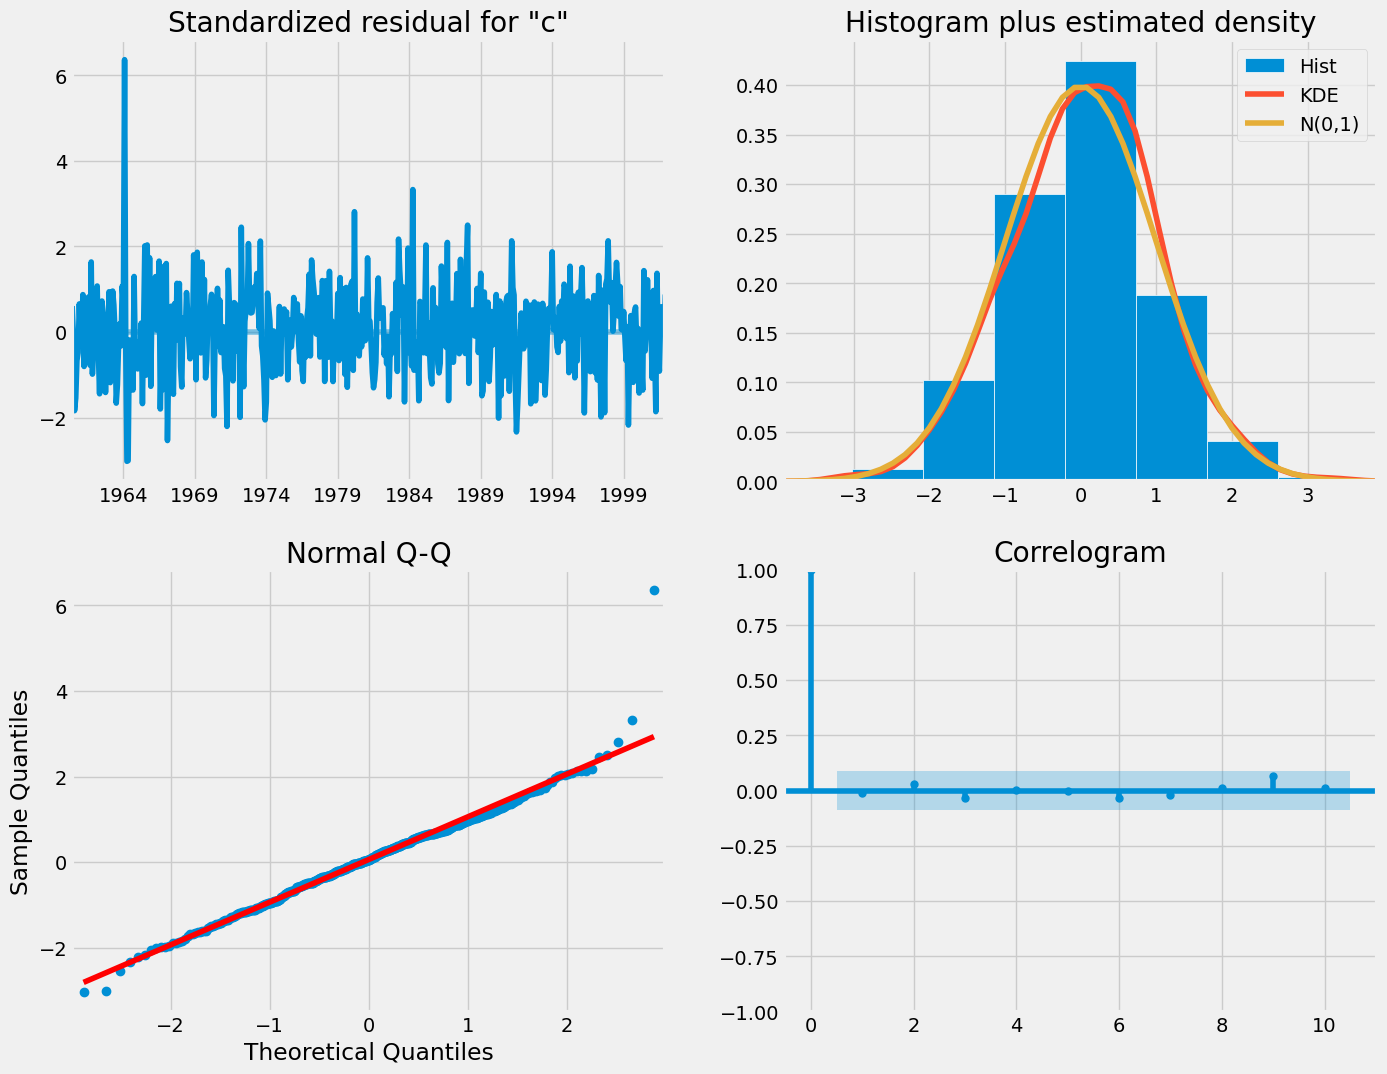

In [10]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [11]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

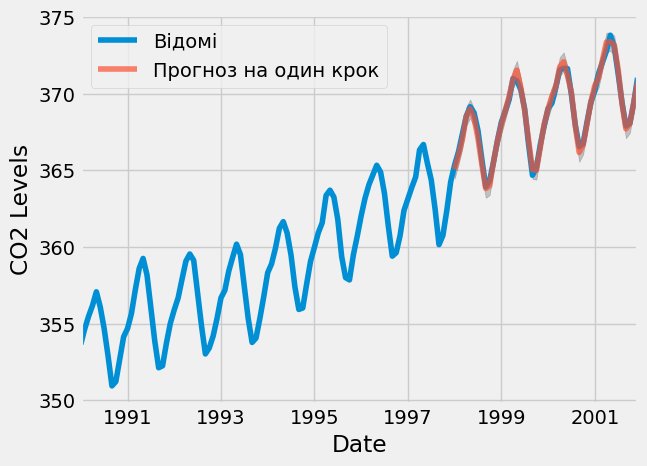

In [12]:
ax = y['1990':].plot(label='Відомі')
pred.predicted_mean.plot(ax=ax, label='Прогноз на один крок', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

In [13]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':] # Обчислюємо середню квадртичну похибку
mse = ((y_forecasted - y_truth) ** 2).mean()
print('Середня квадратна похибка прогнозів = {}'.format(round(mse, 2)))

Середня квадратна похибка прогнозів = 0.07


In [14]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

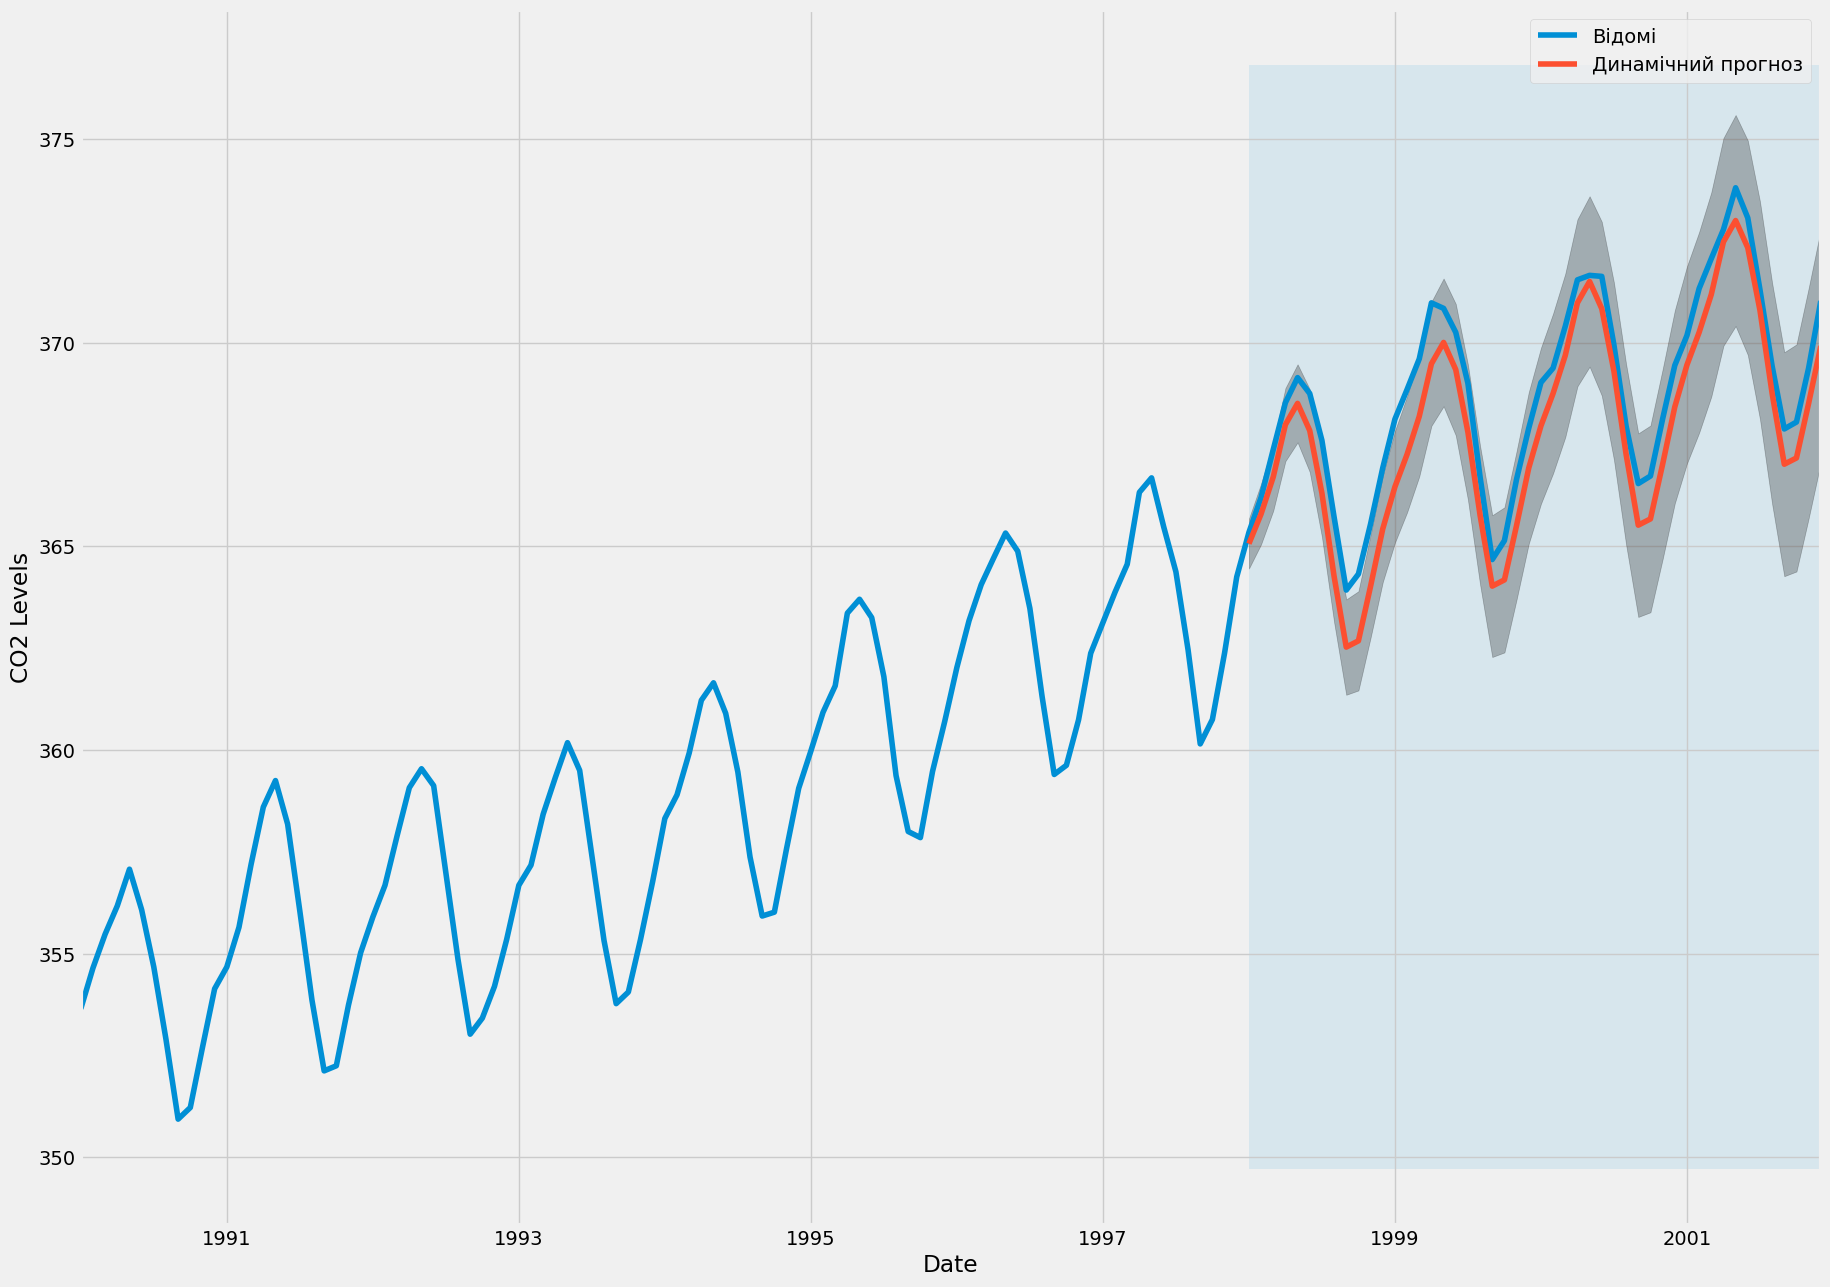

In [15]:
ax = y['1990':].plot(label='Відомі', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Динамічний прогноз', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
pred_dynamic_ci.iloc[:, 0],
pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

In [16]:
# Отримуємо прогноз на 50 кроків у перед
pred_uc = results.get_forecast(steps=500)
# Отримуємо інтервал прогнозу
pred_ci = pred_uc.conf_int()

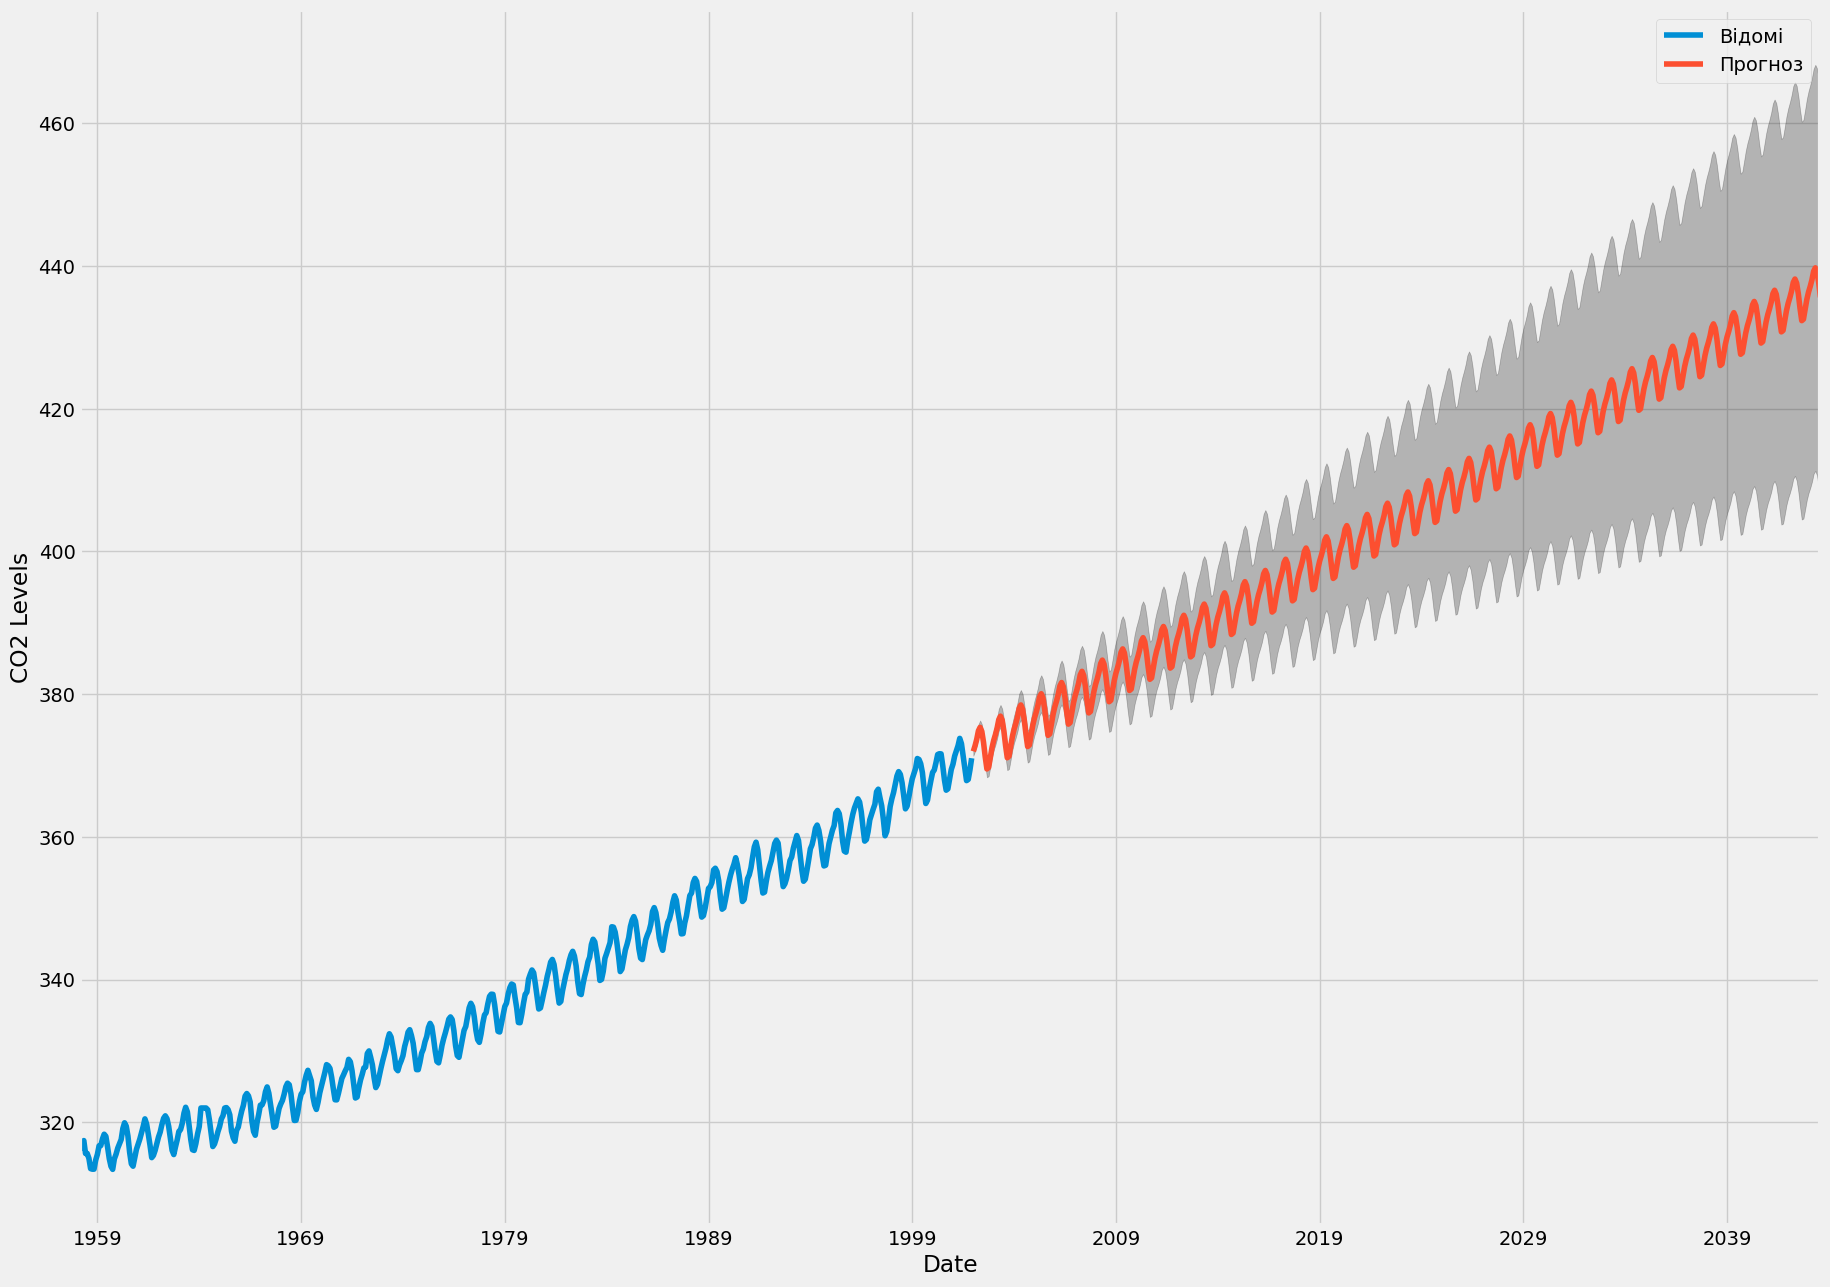

In [17]:
ax = y.plot(label='Відомі', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Прогноз')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()